In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numdifftools as nd


# <font color = 'red'> ЛР 2. Дифференцирование функций многих переменных. Линейная регрессия по произвольному базису. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 07.09.2023

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Дифференцирование функции векторного аргумента. База.  </font>

Вспоминаем понятие дифференцирования.

Пусть, для начала, $f$ - функция одного аргумента, возвращающая один аргумент. Иными словами, $f:\mathbb{R} \rightarrow \mathbb{R}$.

Говорят, что $f$ **дифференцируема** в точке $x_{0}$, если существует конечный предел: $$\lim\limits_{h \to 0} \frac{f(x_{0}+h) - f(x_{0})}{h} = f'(x_{0})$$.

Его называют производной функции в точке $x_{0}$.  Это жу информацию можно записать в дифференциальной форме:  $$f(x_{0}+h) - f(x_{0}) = f'(x_{0}) h + o(h) = [Df_{x_{0}}](h) + o(h)$$.Величину $f'(x_{0}) h = [Df_{x_{0}}](h)$ называют **дифференциалом функции**.


Теперь предположим, что функция $f$ работает несколько иначе. Теперь она принимает на вход векторный аргумент, а возвращает всё ещё скалярный $f:\mathbb{R^{m}} \rightarrow \mathbb{R}$. 

Теперь понятие дифференциала вводят несколько иначе. Мы всё также можем записать: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = \sum\limits_{j=1}^m \frac{\partial f}{\partial x_{m}}\bigg\rvert_{x=\overline{x_{0}}}h_{i} = [Df_{x_{0}}](\overline{h}) + o(||\overline{h}||)$$.

Или же в более сжатой форме: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = (\nabla_{x_{0}} f)\cdot\overline{h} + o(||\overline{h}||) $$

Под производной в этом случае понимают **вектор** (чаще его пищут в виде вектор-столбца) градиента $\nabla_{x_{0}} f = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}}\\...\\\frac{\partial f}{\partial x_{m}} \end{bmatrix}\bigg\rvert_{x=\overline{x_{0}}}$.

В МО мы вынуждены работать с задачами оптимизации как раз таких функций, что немедленно отсылает нас к производным. В частности, используя лекционные записи, вы легко можете получить две несложных формулы матричного дифференцирования.

1. Если функция $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, то $f'(\overline{x}) = \overline{a} $. Где $\overline{x},\overline{a} $ - вектор столбцы.

2.  Если функция $f(\overline{x}) = \overline{x}^{T} A\overline{x}$, то $f'(\overline{x}) = (A+A^{T})\overline{x} $. Где $\overline{x}$ - вектор столбец, $A$ - квадратная матрица соответсвующего размера.


В будущем, возможно, мы дополним список. А пока можете поупражняться [самостоятельно](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf). 


Теперь проверим справедливость формулы 2.

In [4]:
A = np.random.randint(10,size =(10,10))
A

array([[5, 4, 6, 3, 2, 8, 9, 0, 0, 8],
       [2, 1, 6, 9, 6, 0, 1, 3, 6, 0],
       [0, 4, 3, 9, 4, 3, 3, 8, 9, 3],
       [2, 9, 9, 7, 0, 9, 3, 7, 5, 7],
       [6, 9, 2, 9, 4, 9, 2, 3, 7, 6],
       [6, 9, 5, 8, 7, 0, 6, 9, 6, 0],
       [5, 5, 7, 6, 7, 1, 7, 0, 1, 0],
       [8, 9, 0, 9, 2, 3, 5, 9, 0, 2],
       [3, 1, 5, 3, 0, 2, 6, 0, 5, 8],
       [2, 1, 9, 0, 7, 4, 6, 0, 1, 3]])

In [5]:
def func(x): 
    return np.dot(np.dot(x.T,A),x) #задаём вектор-функцию согласно формуле 2

In [6]:
x0 = np.arange(0,10) # конкретные значения x0
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
grad = nd.Gradient(func)(x0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([389., 366., 476., 510., 428., 366., 353., 330., 330., 294.])

In [8]:
np.dot(A + A.T,x0) # а теперь по нашей формуле. Всё сходится.

array([389, 366, 476, 510, 428, 366, 353, 330, 330, 294])

<font color = 'red' size = 5>Задание 1 </font>

1. Изучите подробно формулы полученные выше. Попрактикуйтесь самостоятельно в их выводе.
2. Получите ещё 2 любых формулы для подобного матричного или векторного дифференцирования. Вывод формул кратко оформите в документе.
3. Проверьте справедливость полученных вами формул с помощью встроенных функций пакета numdifftools.

1. $f(x) = x^TAx + b^Tx + c$, где $x$ - вектор столбец, $A$ - квадратная матрица соответсвующего размера, $b$ - вектор столбец, $c$ - константа.

Найдем производную следующим образом:

* $f(x) = \sum\limits_{i=1}^n\left[x_i \left(\sum\limits_{j=1}^n a_{ij}x_j \right) + b_ix_i + c_i\right] =  \sum\limits_{i,j=1}^n\left[ x_i a_{ij}x_j \right] + \sum\limits_{i=1}^n b_ix_i + c_i$
* $\dfrac{\partial f(x)}{\partial x_i} = \sum\limits_{i,j=1}^n \left(a_{ij} + a_{ji}\right)x_i + b_i \rightarrow$

$ \rightarrow f'(x) = \left( A + A^T \right)x + b^{T}$ 

In [9]:
A = np.random.randint(10, size=(10, 10))
b = np.random.randint(10, size=(10, 1))
c = np.random.randint(10)
A, b, c

(array([[9, 7, 1, 0, 6, 6, 2, 0, 2, 6],
        [3, 4, 0, 4, 7, 9, 9, 5, 3, 7],
        [8, 3, 2, 8, 2, 1, 0, 2, 5, 0],
        [1, 7, 3, 0, 7, 1, 2, 4, 8, 5],
        [8, 5, 1, 8, 0, 6, 7, 9, 5, 6],
        [1, 5, 3, 4, 7, 9, 9, 6, 1, 0],
        [9, 8, 9, 0, 2, 7, 6, 1, 2, 4],
        [4, 7, 3, 5, 1, 4, 2, 0, 0, 3],
        [7, 7, 6, 0, 6, 8, 4, 1, 2, 6],
        [5, 1, 3, 8, 8, 6, 1, 3, 2, 5]]),
 array([[1],
        [9],
        [9],
        [0],
        [4],
        [3],
        [0],
        [5],
        [3],
        [9]]),
 1)

In [10]:
def func1(x):
    return np.dot(x.T, np.dot(A, x)) + np.dot(b.T, x) + c

In [11]:
x0 = np.array(range(10))
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
from scipy.optimize import approx_fprime

In [13]:
grad = [int(x) for x in approx_fprime(x0, func1, epsilon=1e-6)]
grad

[388, 512, 289, 373, 469, 474, 343, 223, 295, 374]

In [14]:
np.dot(A + A.T,x0) + b.T # а теперь по моей формуле. Всё сходится.

array([[388, 512, 289, 374, 470, 474, 343, 224, 295, 374]])

_________________________
2. $f(x) = e^{x^Tx}$

Распишем: 

* $
f(x) = e ^{\sum\limits_{i=1}^n x_{i}^2}
$
* Компонента градиента:
$$
  \dfrac{\partial f(x)}{\partial x_k} = e ^{\sum\limits_{i=1}^n x_{i}^2} \cdot \left( \dfrac{\partial (\sum\limits_{i=1}^n x_{i}^2)}{\partial x_k} \right) = e ^{\sum\limits_{i=1}^n x_{i}^2} \cdot 2x_k
$$
  Значит,  $f'(x) = 2 e^{x^Tx} \cdot x$

In [15]:
def func2(x):
    return np.exp(np.dot(x.T, x))

In [16]:
x0 = np.array(range(10))
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
grad = nd.Gradient(func2)(x0) 
grad

array([0.00000000e+000, 1.18838548e+124, 2.37677097e+124, 3.56515645e+124,
       4.75354193e+124, 5.94192742e+124, 7.13031290e+124, 8.31869838e+124,
       9.50708387e+124, 1.06954694e+125])

In [18]:
2*np.dot(np.exp(np.dot(x0.T, x0)), x0) # а теперь по моей формуле

array([0.00000000e+000, 1.18838548e+124, 2.37677097e+124, 3.56515645e+124,
       4.75354193e+124, 5.94192742e+124, 7.13031290e+124, 8.31869838e+124,
       9.50708387e+124, 1.06954694e+125])

## <font color = 'green'> 2. Линейная регрессия по произвольному базису. </font>

Пусть задано множество пар признаков(фич) и меток $A = \{(\overline{X}_{1},y_{1}),(\overline{X}_{2},y_{2}),...,(\overline{X}_{n},y_{n})\}$. Важно понимать, что теперь каждый элемент множества признаков это вектор состоящий из некоторого числа $k$ признаков  $\overline{X}_{i} = (x_{1},x_{2},...x_{k})$.

Стоит задача получить функцию, позволяющую предсказывать непрерывную метку по $y$ набору признаков $X$. Такую задачу называют множественной регрессией. 

Для решения данной задачи можно использовать формулу множественной регрессии:$$f(\overline{x})=\sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{x}) $$.

В приведённой выше формуле, стоит взвешенная сумма некоторых произвольных функций от вектора фич. Это и есть **формула множественной линейной регрессии по произвольному базису**. 

Частным случаем такой регрессии можно считать тривиальную линейную регрессию, когда $\phi_{i}(\overline{x}) = $. Тогда добавив фиктивную функцию $\phi_{0}(\overline{x}) = 1$ получим формулу **классической линейной регрессии**.

$$f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $$.

Обратите внимание, что формула парной регресии $f(x) = a x +b $ - тоже частный случай вышеприведённой. 

Также стоит заметить, *что количество базисных функций может быть как меньшим, так и большим, чем количество изначальных фич*.

Теперь приступим к **обучению полученной модели** $f(\overline{x})=\sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{x}) $. Оно сводится к нахождению весов $w_{1},...,w_{m}$ на основе исходных обучающих данных.

Аналогично парной регрессии составим функцию потерь и минимизируем её: $$ \mathcal{L}(\overline{w}) =\sum\limits_{i=1}^n (y_{i} - \sum\limits_{j=1}^m w_{i} \phi_{i}(\overline{X_{i}}))^2 \rightarrow min$$.

Конечно проще записать эту формулу в матричном виде (получите её самостоятельно): $$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}, $$
где $Q$ - *информационная матрица*, которая определяется следующим образом: $$Q=\begin{bmatrix}
    \phi_{1}(\overline{x_{1}})       &  \phi_{2}(\overline{x_{1}}) & \phi_{3}(\overline{x_{1}}) & \dots & \phi_{m}(\overline{x_{1}}) \\
    \phi_{1}(\overline{x_{2}})       &  \phi_{2}(\overline{x_{2}}) & \phi_{3}(\overline{x_{2}}) & \dots & \phi_{m}(\overline{x_{2}})   \\
                            ...\\
   \phi_{1}(\overline{x_{n}})       &  \phi_{2}(\overline{x_{n}}) & \phi_{3}(\overline{x_{n}}) & \dots & \phi_{m}(\overline{x_{n}}) 
\end{bmatrix}, $$

$\overline{w}$ - вектор столбец весов: $$ \overline{w} = \begin{bmatrix} 
w_{1}\\
w_{2}\\
...\\
w_{m}
\end{bmatrix},
$$

$\overline{y}$ - вектор столбец известных целевых меток: $$ \overline{y} = \begin{bmatrix} 
y_{1}\\
y_{2}\\
...\\
y_{m}
\end{bmatrix}.
$$


Далее решаем задачу оптимизации. Отыщем производную полученной скалярной вектор-функции и приравняем к 0, опираясь на знания из п. 1.$$\frac{\partial \mathcal{L}}{\partial w} = \nabla \mathcal{L} =\nabla \mathcal{L}((\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}) = \nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = 0$$

Далее применяем формулы из п. 1. $$\nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$

Откуда немедленно получаем итоговую формулу для вектора весов: $$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.


Полученная формула имеет некоторые ограничения (подумайте какие). Также следует продумывать выбор базисных функций. Для получения *информационной матрицы* исходные данные требуют некоторого преобразования в зависимости от выбора базисных функций.

<font color = 'orange' size = 3>Пример 1 </font>

Для начала используем встроенные возможности.

In [19]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

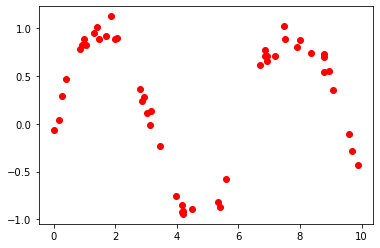

In [20]:
plt.scatter(x, y, c ='red')

In [135]:
from sklearn.linear_model import LinearRegression #пробуем обучить стандартную модель регрессии из ЛР1 
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [136]:
X = x[:, np.newaxis]
(X.shape,x.shape)

((50, 1), (50,))

In [137]:
model.fit(X, y)

LinearRegression()

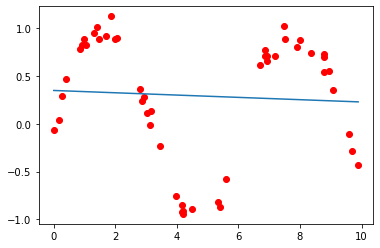

In [138]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]# по рисунку видим, что получили хрень
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(testx))

In [139]:
model.score(X,y)# позорище, а не модель

0.003269744706462907

А теперь добавим другой базис. Видно, что функция похожа на степенную. Используем полиномиальный базис.
Класс [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) позволяет преобразовать ваши данные  и перейти от стандартного базиса ${x_1,x_2,...x_n}$ полиномиальному базису, который состоит из всех возможных функций $x_1^{k1}x_2^{k2}...x_n^{kn} : k1+k2+...kn<=4$

In [140]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)

In [141]:
X_new = poly_reg.fit_transform(X)

In [142]:
X_new; #вместо одного x теперь целый вектор фич степени от 0 до 4

In [143]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [144]:
model.fit(X_new, y)

LinearRegression()

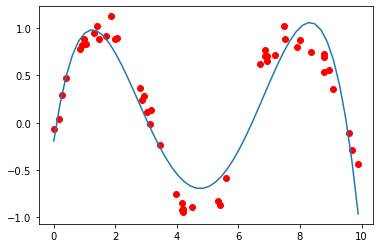

In [145]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(poly_reg.fit_transform(testx)))
# теперь для предсказания модели нужно передавать преобразованные в тот же базис данные
# результат лучше

In [146]:
model.score(X_new,y)# уже лучше!

0.8709660328448418

In [147]:
(model.coef_,model.intercept_) # а вот и полученные веса для базисных функций. 

(array([ 0.        ,  2.16741907, -1.22565575,  0.20937262, -0.01096061]),
 -0.19599947059724465)

**Упражнение** Подумайте, за что отвечает параметр fit_intercept и почему первый коэффициент равен 0

Параметр `fit_intercept` определяет, будет ли оцениваться свободный член модели. В случае, если `fit_intercept=True`, модель будет включать вектор-константу в регрессионное уравнение. В противном случае, если `fit_intercept=False`, свободный член не будет оцениваться, и модель будет проходить через начало координат.

<font color = 'orange' size = 3>Пример 2 </font>

Теперь возьмём многомерные фичи. Используем рыбный датасет из файла Fish.csv и попробуем создать модель регрессии для предсказания веса (столбец weight).

Попробуем использовать стандартную формулу для классической регрессии $f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $.


In [149]:
dataframe=pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [150]:
X = dataframe.drop(["Species","Weight"],axis=1).values # выбираем то, что будет фичами

In [151]:
X

array([[23.2   , 25.4   , 30.    , 11.52  ,  4.02  ],
       [24.    , 26.3   , 31.2   , 12.48  ,  4.3056],
       [23.9   , 26.5   , 31.1   , 12.3778,  4.6961],
       [26.3   , 29.    , 33.5   , 12.73  ,  4.4555],
       [26.5   , 29.    , 34.    , 12.444 ,  5.134 ],
       [26.8   , 29.7   , 34.7   , 13.6024,  4.9274],
       [26.8   , 29.7   , 34.5   , 14.1795,  5.2785],
       [27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [27.6   , 30.    , 35.1   , 14.0049,  4.8438],
       [28.5   , 30.7   , 36.2   , 14.2266,  4.9594],
       [28.4   , 31.    , 36.2   , 14.2628,  5.1042],
       [28.7   , 31.    , 36.2   , 14.3714,  4.8146],
       [29.1   , 31.5   , 36.4   , 13.7592,  4.368 ],
       [29.5   , 32.    , 37.3   , 13.9129,  5.0728],
       [29.4   , 32.    , 37.2   , 14.9544,  5.1708],
       [29.4   , 32.    , 37.2   , 15.438 ,  5.58  ],
       [30.4   , 33.    , 38.3   , 14.8604,  5.2854],
       [30.4   , 33.    , 38.5   , 14.938 ,  5.1975],
       [30.9   , 33.5   , 38

In [152]:
y = dataframe["Weight"].values # вес будем предсказывать

In [153]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [154]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

LinearRegression()

In [155]:
model.fit(X, y)

LinearRegression()

In [156]:
model.score(X,y)

0.8852867046546207

In [157]:
(model.coef_,model.intercept_)

(array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 -499.5869553569422)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите подробно описанные выше примеры.
2. Реализуйте функции для работы регрессии по произвольному базису самостоятельно (используйте только базовые функции и numpy), используя формулы, полученные выше. Используйте матричные вычисления!
3. Попрактикуйте модели и вашу и встроенную на разных искусственных данных.
4. Постройте модели (встроенную и вашу) для прогнозирования веса рыбы из файла Fish.csv. Попробуйте различные базисы, различные комбинации фич и постарайтесь повысить точность прогноза.
5. Попытайтесь предсказать [Perfomance index](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) студентов используя вашу собственную и встроенные модели с различными базисами. 
6. Подумайте, как повлияет на модель использование слишком большого количества базисных фич.
7. В примере выше мы тестируем полученную модель на тех же данных, что и обучаем. В целом это не очень хорошо. Разделите изначальные данные на обучающую и тестовую выборку и повторите вычисления точности.


Указание! Для оценки качества модели, в случае, если рисунок не возможен используйте [коэффициент детерминации](https://wiki.loginom.ru/articles/coefficient-of-determination.html): $$R^{2}=1-\frac{(\overline{y} -f(\overline{x}))(\overline{y} - f(\overline{x}))^{T}}{(\overline{y} - mean(\overline{y}))(\overline{y} - mean(\overline{y}))^{T}},$$

где $\overline{y}$ - столбец обучающих меток, $f(\overline{x})$ - функция предсказания применённая к вектор столбцу исходных признаков. 

<font color = 'magenta' size = 5>2 </font>

In [ ]:
def createQ(X):
    n = X.shape[0]
    Q = np.concatenate([np.ones(n).reshape(n, 1), X], axis=1)
    return Q

def fit(X, y, fit_intercept = False, alpha = 0):
        if fit_intercept:
            Q = createQ(X)
            ridge = alpha * np.eye(Q.shape[1])
            rez = np.dot(np.dot(np.linalg.inv(np.dot(Q.T , Q) + ridge) , (Q.T)) , y)
            intercept = rez[0]
            coef = rez[1:]
        else:    
            intercept = 0
            ridge = alpha * np.eye(X.shape[1])
            coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + ridge) , (X.T)) , y)
        return intercept, coef

def predict(X, intercept, coef):
        Q = createQ(X)
        return np.dot(Q , np.concatenate([[intercept], coef]))

def score(X, y, intercept, coef):
        Q = createQ(X)
        f = np.dot(np.concatenate([[intercept], coef]), Q.T)
        R2 = 1 - np.dot(y - f, (y - f).T) / np.dot(y - np.mean(y), (y - np.mean(y)).T)
        return R2

In [758]:
def scoreAdj(X, y, intercept, coef):
        Q = createQ(X)
        f = np.dot(np.concatenate([[intercept], coef]), Q.T)
        R2 = 1 - np.dot(y - f, (y - f).T) / np.dot(y - np.mean(y), (y - np.mean(y)).T)
        n = X.shape[0]  
        p = X.shape[1]  
        adjusted_R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)
        return adjusted_R2

<font color = 'magenta' size = 5>3 </font>

In [759]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
X = x[:, np.newaxis]
y = np.sin(x) + 0.1 * rng.randn(50)

Используем полиномиальный базис.

In [760]:
poly = PolynomialFeatures(degree=4)

In [809]:
X_new = poly.fit_transform(X)
X_new.shape

(159, 462)

In [762]:
intercept, coef = fit(X_new, y)

In [763]:
score(X_new, y,intercept, coef )

0.8709660328448433

In [764]:
scoreAdj(X_new, y,intercept, coef )

0.8563030820317573

In [753]:
intercept, coef

(0, array([-0.19599947,  2.16741907, -1.22565575,  0.20937262, -0.01096061]))

In [754]:
model = LinearRegression(fit_intercept=False)
model.fit(X_new, y)
(model.coef_,model.intercept_)

(array([-0.19599947,  2.16741907, -1.22565575,  0.20937262, -0.01096061]), 0.0)

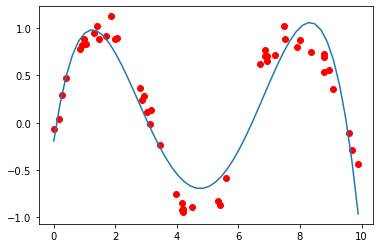

In [755]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx, predict(poly.fit_transform(testx), intercept, coef))

In [1]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
X = x[:, np.newaxis]
y = np.cos(x) - 0.1 * rng.randn(100)

NameError: name 'np' is not defined

In [ ]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')

In [771]:
poly = PolynomialFeatures(degree=6)

In [772]:
X_new = poly.fit_transform(X)

In [773]:
intercept, coef = fit(X_new, y)

In [774]:
score(X_new, y,intercept, coef )

0.9772886062497742

In [775]:
scoreAdj(X_new, y,intercept, coef )

0.9755605654209527

In [473]:
intercept, coef

(0,
 array([ 7.91084259e-01,  1.12346924e+00, -1.98612698e+00,  7.37786848e-01,
        -1.06569239e-01,  6.30496178e-03, -1.16556021e-04]))

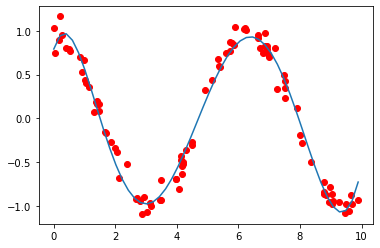

In [474]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx, predict(poly.fit_transform(testx), intercept, coef))

<font color = 'magenta' size = 5>4</font>

In [801]:
dataframe = pd.read_csv("Fish.csv") 
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Встроенная

In [777]:
X = dataframe.drop(["Species","Weight"],axis=1).values 
y = dataframe["Weight"].values 

In [778]:
model = LinearRegression(fit_intercept=True)  
model.fit(X, y)
model.score(X,y)

0.8852867046546207

In [779]:
(model.coef_,model.intercept_)

(array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 -499.5869553569422)

Моя

In [780]:
intercept, coef = fit(X,y, fit_intercept=True)
intercept, coef

(-499.58695535749064,
 array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]))

In [781]:
score(X,y, intercept, coef)

0.8852867046546206

In [782]:
score(X, y,intercept, coef )

0.8852867046546206

Генерация признаков на основе сплайнов

In [802]:
X = dataframe.drop(["Species","Weight"],axis=1).values 
y = dataframe["Weight"].values 

In [803]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline

spline_transformer = SplineTransformer(n_knots=5, degree=6)
model = make_pipeline(spline_transformer, LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)
model.score(X,y)

0.9883558552423346

In [804]:
X_new = spline_transformer.fit_transform(X)

In [808]:
intercept, coef

(0,
 array([ 1.43234524e+16,  1.43234625e+16,  1.43234624e+16,  1.43234624e+16,
         1.43234624e+16,  1.43234624e+16,  1.43234624e+16,  1.43234623e+16,
         1.43234643e+16,  1.43226568e+16, -1.61445880e+16, -1.61445878e+16,
        -1.61445879e+16, -1.61445879e+16, -1.61445879e+16, -1.61445879e+16,
        -1.61445879e+16, -1.61445878e+16, -1.61445876e+16, -1.61431615e+16,
         1.72123476e+15,  1.72122697e+15,  1.72122707e+15,  1.72122706e+15,
         1.72122706e+15,  1.72122706e+15,  1.72122706e+15,  1.72122710e+15,
         1.72122438e+15,  1.72063386e+15,  9.98980302e+13,  9.98984274e+13,
         9.98984081e+13,  9.98984111e+13,  9.98984098e+13,  9.98984108e+13,
         9.98984093e+13,  9.98984134e+13,  9.98983879e+13,  9.98989866e+13,
         5.18628517e+08, -1.34266180e+07,  7.62213015e+05,  1.82468308e+05,
         2.52452722e+05,  2.37588610e+05,  2.40674135e+05,  2.39830451e+05,
         2.38868521e+05,  1.08170353e+05]))

<font color = 'magenta' size = 5>5 </font>

In [606]:
dataframe = pd.read_csv("Student_Performance.csv")
dataframe.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [607]:
dataframe = dataframe.replace({'Extracurricular Activities': {'Yes': 1, 'No': 0}})

In [608]:
X = dataframe.drop(['Performance Index'], axis=1).values
y = dataframe['Performance Index'].values

In [609]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

In [610]:
model.score(X,y)

0.9887523323780958

In [611]:
intercept, coef = fit(X, y)

In [612]:
score(X, y,intercept, coef )

0.9079123364177972

In [613]:
intercept, coef

(0, array([ 2.19598399,  0.81721967, -1.1708704 , -1.50360117, -0.26564863]))

In [614]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline

spline_transformer = SplineTransformer(n_knots=5, degree=4)
model = make_pipeline(spline_transformer, LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)
model.score(X,y)

0.9887826568319227

<font color = 'magenta' size = 5>6 </font>

In [615]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
X = x[:, np.newaxis]
y = np.sin(x) + 0.1 * rng.randn(50)

In [741]:
poly = PolynomialFeatures(degree=14)

In [742]:
X_new = poly.fit_transform(X)

In [743]:
intercept, coef = fit(X_new, y)

In [744]:
score(X_new, y,intercept, coef )

0.8064638615722171

In [745]:
intercept, coef

(0,
 array([ 8.19251708e-01,  9.84672450e-01, -1.07375309e+00,  1.11015712e+00,
        -8.69345038e-01,  3.84003042e-01, -9.63913201e-02,  1.17853693e-02,
         6.27188021e-05, -1.72840650e-04,  5.53266990e-06,  3.08851578e-06,
        -4.45763171e-07,  2.46647026e-08, -5.06764802e-10]))

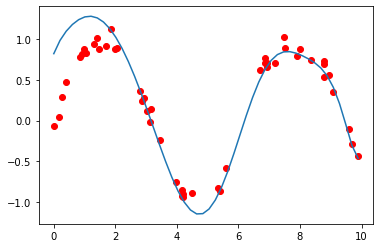

In [746]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx, predict(poly.fit_transform(testx), intercept, coef))

Увеличение количества базисных фич может привести к переобучению.

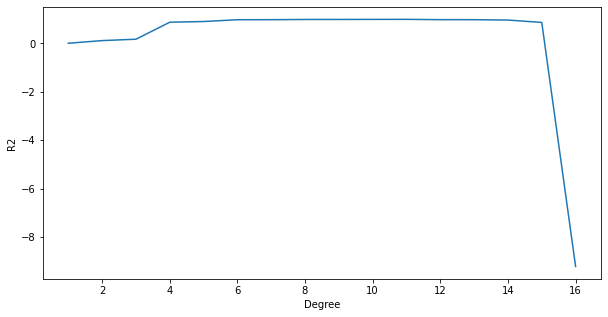

In [649]:
train_scores = []

# Проверка моделей с разной степенью PolynomialFeatures
for d in range(1, 17):
    poly = PolynomialFeatures(degree=d)
    X_new = poly.fit_transform(X)
    intercept, coef = fit(X_new, y)
    train_scores.append(score(X_new, y,intercept, coef ))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 17), train_scores)
plt.xlabel('Degree')
plt.ylabel('R2')
plt.show()

<font color = 'magenta' size = 5>7</font>

In [765]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(['Performance Index'], axis=1), dataframe['Performance Index'], test_size=.3, random_state=0)

In [766]:
intersect, coef = fit(X_train, y_train)

In [767]:
score(X_test,y_test, intersect, coef)

0.9072862539233616

In [768]:
scoreAdj(X_test,y_test, intersect, coef)

0.9071314213480833

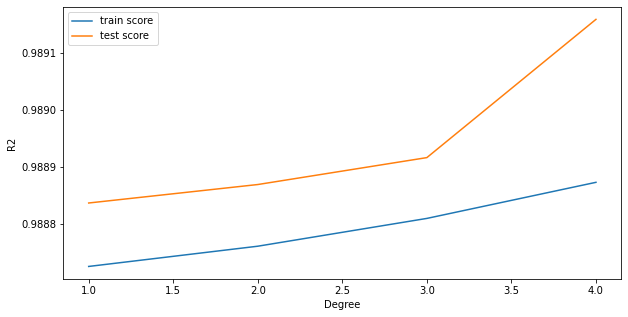

In [736]:
train_scores = []
test_scores = []

# Проверка моделей с разной степенью PolynomialFeatures
for d in range(1, 5):
    poly = PolynomialFeatures(degree=d)
    X_new = poly.fit_transform(X_train)
    intercept, coef = fit(X_new, y_train, alpha = 0.1)
    train_scores.append(score(X_new, y_train,intercept, coef ))
    X_new = poly.fit_transform(X_test)
    intercept, coef = fit(X_new, y_test, alpha = 0.1)
    test_scores.append(score(X_new, y_test,intercept, coef ))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), train_scores, label='train score')
plt.plot(range(1, 5), test_scores, label='test score' )
plt.legend()
plt.xlabel('Degree')
plt.ylabel('R2')
plt.show()

to be continued... 🧡